In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#선형회귀 관련 scikit-learn 라이브러리
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score #MSE에러 확인 #R2확인

#선형회귀 관련 statsmodels 라이브러리
import statsmodels.api as sm

예제

In [2]:
X=np.array([[0],[1],[2]])
y=np.array([0, 1.2, 1.6])

#선형회귀 object 생성
reg=linear_model.LinearRegression()

#training
reg.fit(X,y)

#training data 예측
pred_train = reg.predict(X)

#test
pred_test = reg.predict([[1.5]])

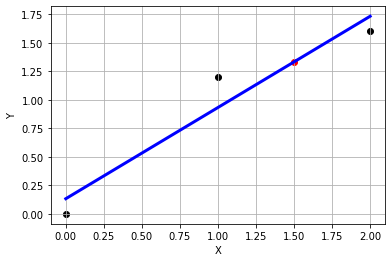

In [4]:
#Plot outputs
plt.scatter(X, y,color = "black" )
plt.scatter(1.5, pred_test, color="red")
plt.plot(X,pred_train, color="blue", linewidth =3)

plt.xlabel("X")
plt.ylabel("Y")

plt.grid()
plt.show()

In [ ]:
pred_test

array([1.33333333])

In [ ]:
reg.coef_

array([0.8])

# **Advertising 데이터 불러오기**



In [5]:
# 데이터 loading
from google.colab import drive
drive.mount('/content/drive')

ad = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Advertising.csv", index_col=0)

Mounted at /content/drive


Advertising data 선형회귀(scikit-learn)

In [7]:
train = ad[:-20]
test = ad[-20:]

# training data와 features와 response 분리
train_X=train[["TV", "Radio", "Newspaper"]]
train_y=train[["Sales"]]

#test data의 feature와 response 분리
test_X = test[["TV", "Radio", "Newspaper"]]
test_y = test[["Sales"]]

In [8]:
# 선형회귀 object 생성
regr = linear_model.LinearRegression()

regr.fit(train_X[["TV"]], train_y)

train_y_pred = regr.predict(train_X[["TV"]])

test_y_pred = regr.predict(test_X[["TV"]])

In [9]:
print("Coefficients: \n", regr.coef_)

print("Training MSE: %.3f" % mean_squared_error(train_y, train_y_pred))

print("Test MSE:%.3f" % mean_squared_error(test_y, test_y_pred))

print("R^2: %.3f" % r2_score(train_y, train_y_pred))


Coefficients: 
 [[0.0468933]]
Training MSE: 10.316
Test MSE:12.324
R^2: 0.607




```

```

# **Advertising data 선형회귀(statsmodels)**

In [10]:
#statsmodels 사용을 위한 XO feature 추가
#statsmodels의 OLS 함수는 데이타 내에 intercept에 해당하는 feature 필요

sm_train_X=train_X
sm_train_X["X0"] = 1 #y절편 intercept 칼럼추가

sm_test_X = test_X
sm_test_X["X0"] = 1

In [ ]:
sm_test_X

In [12]:
result = sm.OLS(train_y, sm_train_X[["X0", "TV"]]).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     275.2
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           5.76e-38
Time:                        07:24:15   Log-Likelihood:                -465.44
No. Observations:                 180   AIC:                             934.9
Df Residuals:                     178   BIC:                             941.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             7.1649      0.478     14.978      0.000       6.221       8.109
TV             0.0469      0.003     16.589      0.000       0.041       0.052
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.547
Skew:                          -0.127   Prob(JB):                        0.761
Kurtosis:                       2.906   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

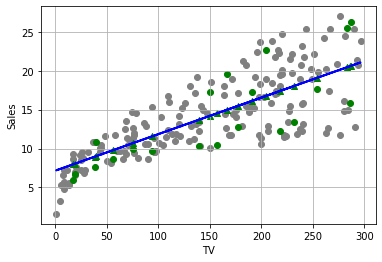

In [13]:
plt.scatter(train_X["TV"], train_y["Sales"], color="gray")
plt.scatter(test_X["TV"], test_y["Sales"], color="green")
plt.plot(train_X["TV"], train_y_pred, color="blue", linewidth = "2")
plt.scatter(test_X["TV"], test_y_pred, color="green",marker="^")

plt.xlabel("TV")
plt.ylabel("Sales")

plt.grid()
plt.show()

In [ ]:
""